In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
results = pd.read_csv("./data/survey_results_public.csv", index_col="ResponseId")
resultsSchema = pd.read_csv("./data/survey_results_schema.csv")

In [ ]:
results.head()

In [ ]:
languages = "LanguageHaveWorkedWith"
salary = "ConvertedCompYearly"

results.rename(columns={languages: "Languages", salary: "Salary"}, inplace=True)
#results.head(3)

#Anem a suprimir els Nans, perquè no ens apareguin als resultats
results.dropna(subset=["Salary", "Languages"], inplace=True)
#results["Salary"]

#Us del mètode .loc, ens quedem amb totes les files ":" , però en aquest cas, només utilitzem Country, Salary i Languages
results = results.loc[:, ["Country", "Salary", "Languages"]].sort_values(by="Salary")

filtre = (results["Salary"] >= 10000) & (results["Salary"] <= 3e6)
results = results[filtre]
results

In [ ]:
# Creem una variable que és la columna dels llenguatges
lg = results["Languages"]
allLanguages = lg[21404].split(";")

for row in lg:
    for lang in row.split(";"):
        if lang in allLanguages:
            continue
        else:
            allLanguages.append(lang)
#sort() ens ordena alfabèticament
allLanguages.sort()
#allLanguages

#Hem utilitzat numpy per inicialitzar a 0 un DataFrame amb la columna Salary
meanSalary = pd.DataFrame(data = np.zeros(len(allLanguages)), index = allLanguages, columns = ["Salary"])
meanSalary

In [63]:
#Importem llibreria d'expressions regulars, doncs estem tenint problemes al separar els llenguatges a l'string, ja que no reconeix alguns caràcters
import re

for lang in allLanguages:
    try:
        #A continuació, estem buscant dins de Languages, si dins l'string conté un dels llenguatges per poder fer la mitja del Salary
        mask = results["Languages"].str.contains(re.escape(lang))
        average = results.loc[mask, "Salary"].mean()
        meanSalary.loc[lang, "Salary"] = average
    except Exception:
        print(lang)

meanSalary

,Salary
APL,132385.687500
Ada,101987.839130
Apex,111123.447183
Assembly,115184.755862
Bash/Shell (all shells),111334.168997
C,99417.346595
C#,95933.102206
C++,109191.077789
Clojure,125818.861446
Cobol,107928.296943


In [73]:
colors = [
    "#03071E",
    "#370617",
    "#6A040F",
    "#9D0208",
    "#D00000",
    "#DC2F02",
    "#E85D04",
    "#F48C06",
    "#FAA307",
    "#FFBA08"
]

fontdict = {
    'family': 'serif',
    'color':  'darkred',
    'weight': 'normal',
    'size': 16,
}

In [65]:
pip install PyQt5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\Albert\AppData\Local\Temp\ipykernel_13968\1785761366.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


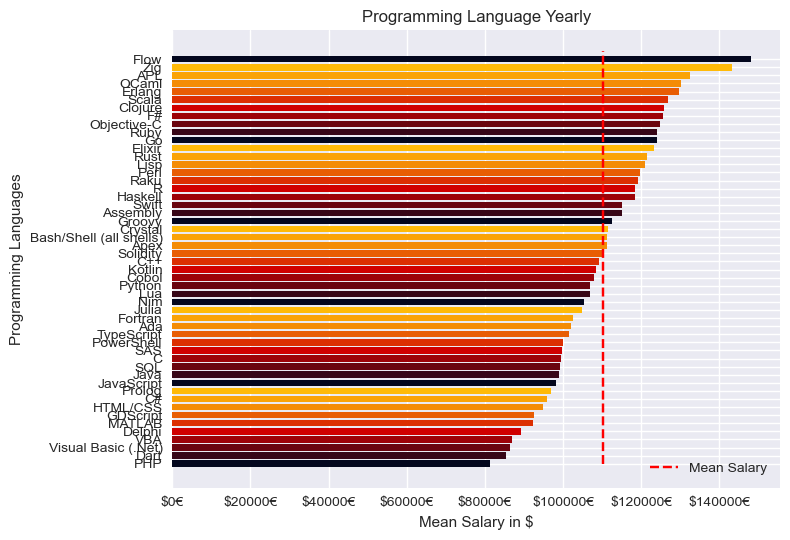

In [83]:
#gt5 serveix per Visual Studio i perquè ens executi el gràfic en una finestra emergent
#%matplotlib gt5

plt.style.use("seaborn")

#Ordenem els valors pq apareguin ordenats al gràfic
meanSalary.sort_values(by="Salary", inplace=True)
plt.barh(meanSalary.index, meanSalary["Salary"], color = colors)
#Aquí calculem
plt.vlines(meanSalary["Salary"].mean(), 0, len(meanSalary["Salary"]), colors = "red", linestyles = "dashed", label = "Mean Salary")

plt.title("Programming Language Yearly")
plt.xlabel("Mean Salary in $")
plt.ylabel("Programming Languages")

#La línea de sota ens afegeix a cada registre el símbol del $ en cada valor
plt.gca().xaxis.set_major_formatter('${x:1.0f}')
plt.legend()
plt.tight_layout()
plt.show()